# Finding Donors for *CharityML*
## EDA Version 0
### Kebei Jiang 05/17/2019

### Goal

The goal of this notebook is to do initial EDA of the data. More importantly, I am trying to follow this [instruction](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#one) and later build my own EDA flow/template.

### Get Started

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article [_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). 

First thing first, I double checked the [origin](https://www.kaggle.com/uciml/adult-census-income) of the original dataset and made following observations.  
1. It was extracted from 1994 Census bureau database and was used as an example in aforementioned paper.  
2. The _'fnlwgt'_ feature is the number of people in full population the census takers believe that observation represents. It can be ignored for the purpose of this project.  
3. The _'census.csv'_ dataset is about the same size as the dataset used in the paper, minus some records with missing or ill-formatted entries.

-----

### 0, data head and description

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries for visulization
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the Census dataset
data = pd.read_csv("census.csv")

display(data.head(n=5))
display(data.describe())
print('Raw data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Raw data has 45222 rows and 14 columns.


**observation**: no missing or ill-formatted entries. no cleansing needed.

-------

### 1, Variable Identification

In [3]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [4]:
for col in data.columns.values:
    print('{} has {} unique values:\n {}\n '.format(col, data[col].nunique(), data[col].unique()))

age has 74 unique values:
 [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
 
workclass has 7 unique values:
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
 
education_level has 16 unique values:
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
 
education-num has 16 unique values:
 [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]
 
marital-status has 7 unique values:
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 
occupation has 14 unique values:
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'

In [5]:
ft_num = data.select_dtypes(include=['int64','float64']).columns.values
ft_cat = data.select_dtypes(exclude=['int64','float64']).columns.values

#print(ft_num)
#print(ft_cat)

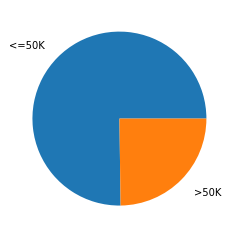

count    45222.000000
mean         0.247844
std          0.431766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income_binary, dtype: float64

In [5]:
data['income_binary'] = [0 if x =='<=50K' else 1 for x in data['income']]
u, u_count = np.unique(data['income_binary'], return_counts=True)
plt.pie(u_count, labels=['<=50K', '>50K'], pctdistance=1.1, labeldistance=1.2)
plt.show()
data['income_binary'].describe()

**observation**:  
 * skewed target variable, need to pay attetion to the skewness while modeling

-------

 ### 2, Univariate Analysis

In [6]:
print('numerical features are: {}'.format(ft_num))

NameError: name 'ft_num' is not defined

In [9]:
age_bins = np.linspace(10, 90, 9)
age_lt50k = np.digitize(data[data['income']=='<=50K']['age'], age_bins)
age_gt50k = np.digitize(data[data['income']=='>50K']['age'], age_bins)
_, age_lt50k_counts = np.unique(age_lt50k, return_counts=True)
_, age_gt50k_counts = np.unique(age_gt50k, return_counts=True)

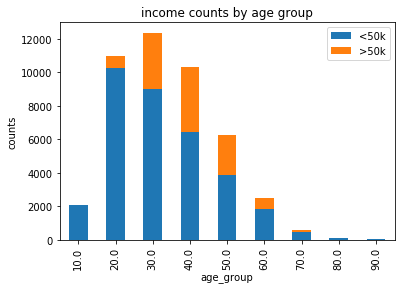

In [10]:
tmp = pd.DataFrame(np.column_stack([age_bins, age_lt50k_counts, age_gt50k_counts]), columns=['age_group', '<50k', '>50k'])
ax = tmp.plot.bar(x='age_group', stacked=True)
ax.set_xlabel('age_group')
ax.set_ylabel('counts')
ax.set_title('income counts by age group')
plt.show()

**observation**:  
 * people younger than 20 or older than 70 make less than the rest of the population, which agrees with common sense.

In [11]:
edu_num_cts = data.groupby(['education-num'])['income'].value_counts().reset_index(name='count')
edu_num_lt50k = edu_num_cts.loc[edu_num_cts['income']=='<=50K']['count']
edu_num_gt50k = edu_num_cts.loc[edu_num_cts['income']=='>50K']['count']

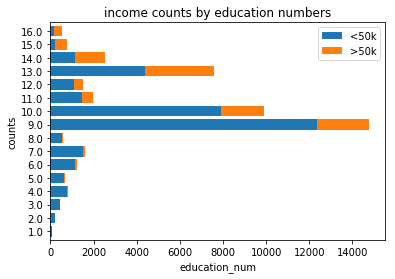

In [12]:
tmp = pd.DataFrame(np.column_stack([edu_num_cts['education-num'].unique(), edu_num_lt50k, edu_num_gt50k, edu_num_gt50k.values/edu_num_lt50k.values]), columns=['education_num', '<50k', '>50k', 'ratio'])
#plt.subplot(211)
ax = tmp[tmp.columns.drop('ratio')].plot.barh(x='education_num', stacked=True, width=0.8)
ax.set_xlabel('education_num')
ax.set_ylabel('counts')
ax.set_title('income counts by education numbers')
plt.show()

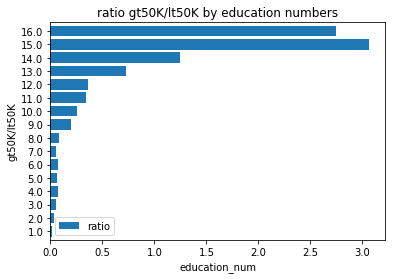

In [13]:
ax = tmp[['education_num','ratio']].plot.barh(x='education_num', width=0.8)
ax.set_xlabel('education_num')
ax.set_ylabel('gt50K/lt50K')
ax.set_title('ratio gt50K/lt50K by education numbers')
plt.show()

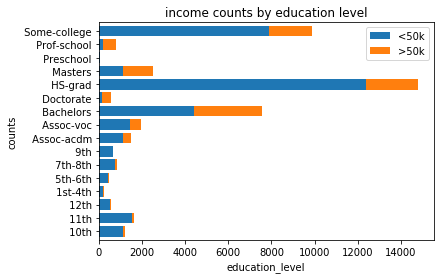

In [15]:
edu_lvl_cts = data.groupby(['education_level'])['income'].value_counts().reset_index(name='count')
edu_lvl_lt50k = edu_lvl_cts.loc[edu_lvl_cts['income']=='<=50K']['count']
edu_lvl_gt50k = edu_lvl_cts.loc[edu_lvl_cts['income']=='>50K']['count']

tmp = pd.DataFrame(np.column_stack([edu_lvl_cts['education_level'].unique(), edu_lvl_lt50k, edu_lvl_gt50k]), columns=['education_level', '<50k', '>50k'])
#plt.subplot(211)
ax = tmp.plot.barh(x='education_level', stacked=True, width=0.8)
ax.set_xlabel('education_level')
ax.set_ylabel('counts')
ax.set_title('income counts by education level')
plt.show()

**observation**:   
 *  _education-level_ and _education-num_ carry the same information, can drop either one.  
 *  higher educational level, higher chance of earning more than 50K

a, gain and loss cannot be both non-zero. people with zero gain and loss is outta market  
b, high gain/low income and high loss/high income, can think of as outlier  
c, highly skewed, consider remove zero values or create a new category

In [19]:
(data['capital-gain']*data['capital-loss']).sum()

0.0

In [25]:
import seaborn as sns

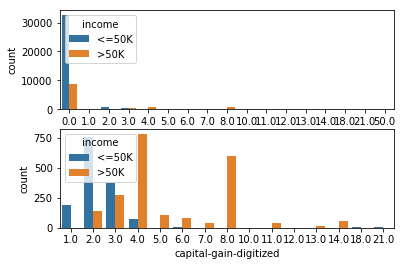

In [32]:
data['capital-gain-digitized']=(data['capital-gain']+1999)//2000
plt.subplot(211)
sns.countplot(x='capital-gain-digitized', hue='income', data=data)
plt.subplot(212)
sns.countplot(x='capital-gain-digitized', hue='income', data=data[~data['capital-gain'].isin([0, 99999])])
plt.show()

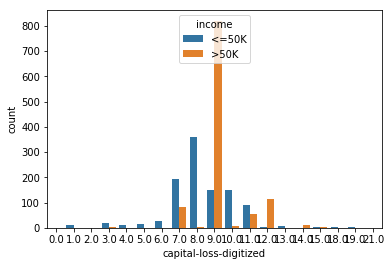

In [28]:
data['capital-loss-digitized']=data['capital-loss']//200
sns.countplot(x='capital-loss-digitized', hue='income', data=data[~data['capital-loss'].isin([0])])
#plt.ylim(0, 500)
plt.show()

In [24]:
capital_non_active = data[(data['capital-gain']==0) & (data['capital-loss']==0)][['capital-gain', 'capital-loss', 'income_binary']]
capital_active = data[(data['capital-gain']!=0) | (data['capital-loss']!=0)][['capital-gain', 'capital-loss', 'income_binary']]

In [215]:
data[data['income']=='<=50K']['capital-gain'].mean()

149.0234021285353

In [216]:
data[data['income']!='<=50K']['capital-gain'].mean()

3991.7916666666665

In [213]:
data[data['income']=='<=50K']['capital-loss'].mean()

54.032427823837246

In [214]:
data[data['income']!='<=50K']['capital-loss'].mean()

193.48706281227695

In [219]:
(data[data['income']=='<=50K']['capital-loss']==0).sum()

32972

In [220]:
(data[data['income']!='<=50K']['capital-loss']==0).sum()

10110

In [221]:
(data[data['income']=='<=50K']['capital-gain']==0).sum()

32599

In [222]:
(data[data['income']!='<=50K']['capital-gain']==0).sum()

8833

In [265]:
data[(data['income']=='<=50K') & (data['capital-gain']==0)].shape[0]

32599

In [266]:
data[(data['income']!='<=50K') &  (data['capital-gain']==0)].shape[0]

8833

In [227]:
(data['income']=='<=50K').sum()

34014

In [228]:
(data['income']!='<=50K').sum()

11208

In [229]:
31557/34014

0.9277650379255601

In [231]:
10110/11208

0.9020342612419701

In [166]:
(data[(data['capital-gain']>80000)]['income']=='<50K').sum()

0

In [264]:
((data['capital-gain']*data['capital-loss'])!=0).sum()

0

In [202]:
income_capital = data['capital-gain'] + data['capital-loss']
income_capital_binary = [0 if x <= 50000 else 1 for x in income_capital]
income_binary = [0 if x =='<=50K' else 1 for x in data['income']]

In [203]:
np.corrcoef(income_capital_binary, income_binary)

array([[1.        , 0.12428252],
       [0.12428252, 1.        ]])

In [201]:
no_capital = data.loc[abs(income_capital)==0]
no_capital.shape

(39292, 14)

In [194]:
np.unique(no_capital['income'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([31557,  7735], dtype=int64))

In [195]:
7735/31557

0.24511201952023323

In [237]:
tmp = data[['capital-gain', 'income']]
tmp.head()

,capital-gain,income
0,2174.0,<=50K
1,0.0,<=50K
2,0.0,<=50K
3,0.0,<=50K
4,0.0,<=50K


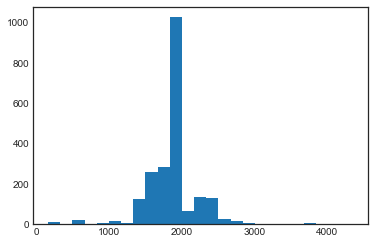

In [246]:
plt.hist(data[data['capital-loss']!=0]['capital-loss'], bins=25)
#plt.ylim(0, 2000)
plt.show()

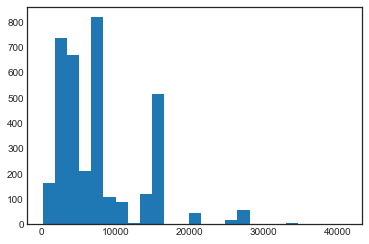

In [251]:
plt.hist(data[~data['capital-gain'].isin([0, 99999])]['capital-gain'], bins=25)
#plt.ylim(0, 2000)
plt.show()

In [255]:
import seaborn as sns

data['capital-gain-digitized']=data['capital-gain']//2000

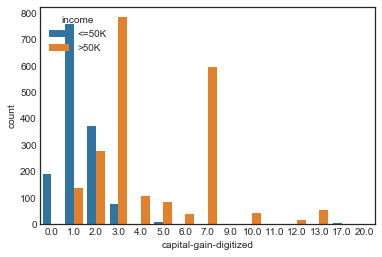

In [262]:
sns.countplot(x='capital-gain-digitized', hue='income', data=data[~data['capital-gain'].isin([0, 99999])])

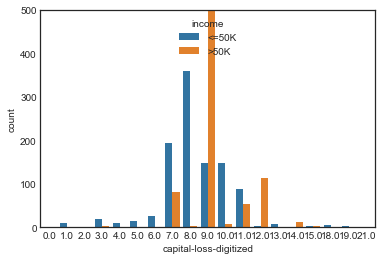

In [260]:
data['capital-loss-digitized']=data['capital-loss']//200
sns.countplot(x='capital-loss-digitized', hue='income', data=data[~data['capital-loss'].isin([0])])
plt.ylim(0, 500)
plt.show()

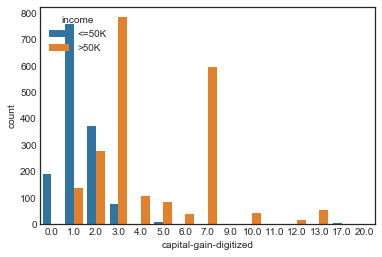

In [262]:
sns.countplot(x='capital-gain-digitized', hue='income', data=data[~data['capital-gain'].isin([0, 99999])])

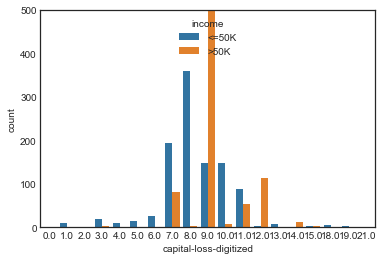

In [260]:
data['capital-loss-digitized']=data['capital-loss']//200
sns.countplot(x='capital-loss-digitized', hue='income', data=data[~data['capital-loss'].isin([0])])
plt.ylim(0, 500)
plt.show()

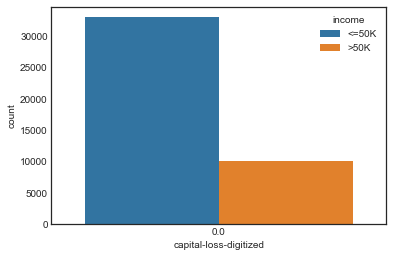

In [331]:
data['capital-loss-digitized']=data['capital-loss']//200
sns.countplot(x='capital-loss-digitized', hue='income', data=data[data['capital-loss'].isin([0])])
#plt.ylim(0, 500)
plt.show()

In [273]:
tmp = data[~data['capital-gain'].isin([0, 99999])]

In [303]:
tmp = data[(data['income']!='<=50K')]
tmp = tmp[~(tmp['capital-gain'].isin([0,99999])) | (tmp['capital-loss']!=0)]

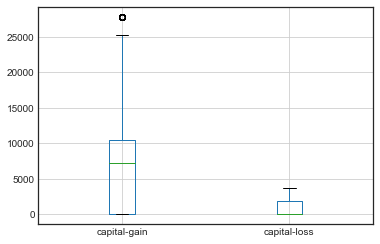

In [304]:
tmp.boxplot(column=['capital-gain', 'capital-loss'])
plt.show()

In [ ]:
pd

In [328]:
capital_null.describe()

count    39292.000000
mean         0.196859
std          0.397630
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income_binary, dtype: float64

In [329]:
capital_any.describe()

count    5930.000000
mean        0.585666
std         0.492648
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: income_binary, dtype: float64

In [327]:
np.mean(income_binary)

0.2478439697492371

KeyError: "['income'] not in index"

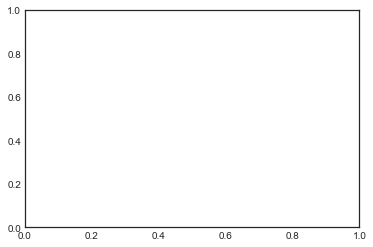

In [307]:
capital_null.boxplot(column=['income'])
plt.show()

a, gain and loss cannot be both non-zero. people with zero gain and loss is outta market  
b, high gain/low income and high loss/high income, can think of as outlier  
c, highly skewed, consider remove zero values or create a new category

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

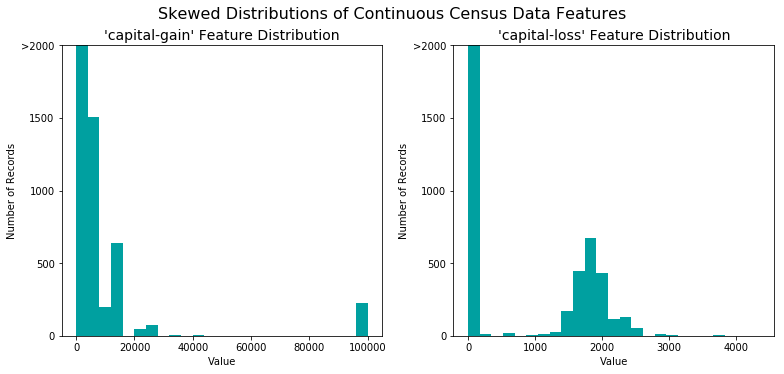

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

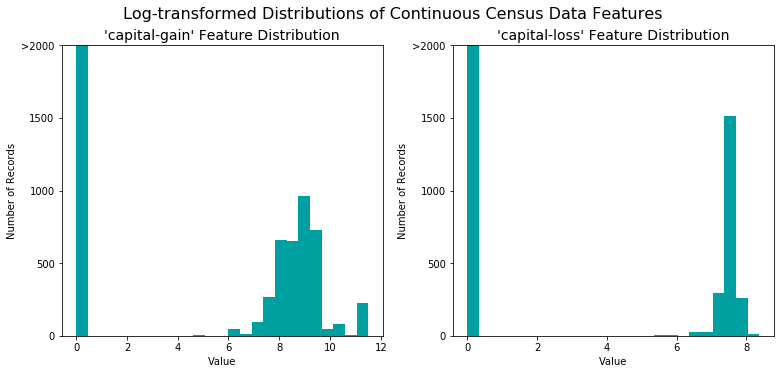

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [7]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = None

# TODO: Extract the feature importances using .feature_importances_ 
importances = None

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.